In [55]:
import pandas as pd
# import pandasql as ps
import matplotlib.pyplot as plt
# Import argsort
from numpy import argsort
from Functions.connection.connection import *
from Functions.AlertP1.data_cleaning import *
from Functions.AlertP1.features import *


## Connection to databse

In [56]:
alertP1=connection("/Users/MarouanKamoun/Desktop/HGO pbl/credentials.csv")

Tables: [('ConsultaUrgencia_doentespedidosconsultaNeurologia2012',), ('consultaneurologia2012',), ('consultaneurologia201216anon_true',), ('hgo_data_032023',)]
51


## Data cleaning

In [57]:
#changing columns with date to a datetime
date_format_alertP1(alertP1)
#change the blank values in proveniencia and priority to unknown
replace_blank(alertP1)
#create a column with the output of a referral and select the refused and accepted ones
alertP1=result(alertP1)
#add text length variable
alertP1=text_length(alertP1)

c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\data_cleaning.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['PROVENIENCIA'][alertP1['PROVENIENCIA']=='']='unknown'
c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\data_cleaning.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['CTH_PRIOR'][alertP1['CTH_PRIOR']=='']='unknown'


In [58]:
data_retorno_not_null=alertP1[alertP1['DATA_RETORNO'].notnull()]
data_retorno_not_null['date_diff'] = (data_retorno_not_null['DATA_RETORNO'] - data_retorno_not_null['DATA_RECEPCAO']).dt.days
avg_date_diff = data_retorno_not_null['date_diff'].mean()
alertP1['DATA_RETORNO'][alertP1['DATA_RETORNO'].isnull()]= alertP1['DATA_RECEPCAO'] + pd.Timedelta(days=avg_date_diff)
alertP1['DATA_RETORNO']=alertP1['DATA_RETORNO'].dt.date
alertP1['DATA_RETORNO']=pd.to_datetime(alertP1['DATA_RETORNO'])
alertP1=alertP1.sort_values('DATA_RETORNO')

C:\Users\MAROUA~1\AppData\Local\Temp/ipykernel_21944/3528124214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_retorno_not_null['date_diff'] = (data_retorno_not_null['DATA_RETORNO'] - data_retorno_not_null['DATA_RECEPCAO']).dt.days
C:\Users\MAROUA~1\AppData\Local\Temp/ipykernel_21944/3528124214.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['DATA_RETORNO'][alertP1['DATA_RETORNO'].isnull()]= alertP1['DATA_RECEPCAO'] + pd.Timedelta(days=avg_date_diff)


In [61]:
alertP1['DATA_RECEPCAO'].to_clipboard ()

## All dataset

In [30]:
data=alertP1.copy()
# compute the number of rows to select
n = int(len(data) * 0.8)

# select the first 80% of rows using slicing
first_80_percent_df = data.iloc[:n+1]
#select the last 20%
last_20_percent_df=data.iloc[n+1:]
last_20_percent_df['DATA_RETORNO']
#n+1 so I don't have an overlapp in the distribution

5238   2016-06-13
2336   2016-06-14
4650   2016-06-15
5409   2016-06-15
8752   2016-06-15
          ...    
5458   2018-02-08
6398   2018-02-09
6664   2018-03-08
154    2018-03-08
142    2019-07-10
Name: DATA_RETORNO, Length: 1874, dtype: datetime64[ns]

In [32]:
df = first_80_percent_df.copy()
df['Total'] = 1
df=df[["DATA_RETORNO","result","Total"]]
df["result"]=df["result"].astype(int)
df.set_index("DATA_RETORNO", inplace=True)
df

,result,Total
DATA_RETORNO,,
2012-01-02,1,1
2012-01-03,1,1
2012-01-04,0,1
2012-01-05,0,1
2012-01-05,0,1
...,...,...
2016-06-08,0,1
2016-06-08,1,1
2016-06-09,0,1


In [34]:
#WEEKLY referral distribution for all sample
WEEKLY_data = df.resample('W').agg({'result': 'sum', 'Total': 'sum'})
WEEKLY_data["Acceptance_Rate"]=WEEKLY_data["result"]/WEEKLY_data["Total"]
#Monthly distribution
monthly_data = df.resample('M').agg({'result': 'sum', 'Total': 'sum'})
monthly_data["Acceptance_Rate"]=monthly_data["result"]/monthly_data["Total"]
WEEKLY_data

,result,Total,Acceptance_Rate
DATA_RETORNO,,,
2012-01-08,2,8,0.250000
2012-01-15,21,34,0.617647
2012-01-22,2,8,0.250000
2012-01-29,33,43,0.767442
2012-02-05,10,23,0.434783
...,...,...,...
2016-05-15,24,33,0.727273
2016-05-22,141,200,0.705000
2016-05-29,2,4,0.500000


In [35]:
df = last_20_percent_df.copy()
df['Total'] = 1
df=df[["DATA_RETORNO","result","Total"]]
df["result"]=df["result"].astype(int)
df.set_index("DATA_RETORNO", inplace=True)
df

,result,Total
DATA_RETORNO,,
2016-06-13,0,1
2016-06-14,0,1
2016-06-15,0,1
2016-06-15,1,1
2016-06-15,0,1
...,...,...
2018-02-08,1,1
2018-02-09,1,1
2018-03-08,1,1


In [39]:
#WEEKLY referral distribution for all sample
WEEKLY_data_train = df.resample('W').agg({'result': 'sum', 'Total': 'sum'})
WEEKLY_data_train["Acceptance_Rate"]=WEEKLY_data_train["result"]/WEEKLY_data_train["Total"]
#Monthly distribution
monthly_data_train = df.resample('M').agg({'result': 'sum', 'Total': 'sum'})
monthly_data_train["Acceptance_Rate"]=monthly_data_train["result"]/monthly_data_train["Total"]
WEEKLY_data_train

,result,Total,Acceptance_Rate
DATA_RETORNO,,,
2016-06-19,24,42,0.571429
2016-06-26,3,9,0.333333
2016-07-03,18,34,0.529412
2016-07-10,29,40,0.725000
2016-07-17,44,53,0.830189
...,...,...,...
2019-06-16,0,0,NaN
2019-06-23,0,0,NaN
2019-06-30,0,0,NaN


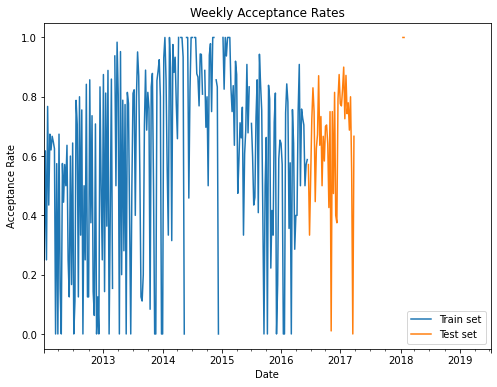

In [37]:
# create a single plot
ax = WEEKLY_data["Acceptance_Rate"].plot(x='Date', y='Value', figsize=(8,6),)

# plot data from the second dataframe onto the same plot
WEEKLY_data_train["Acceptance_Rate"].plot(x='Date', y='Value', ax=ax)

# set title and labels
ax.set_title('Weekly Acceptance Rates')
ax.set_xlabel('Date')
ax.set_ylabel('Acceptance Rate')
ax.legend(['Train set', 'Test set'])


# display the plot
plt.show()

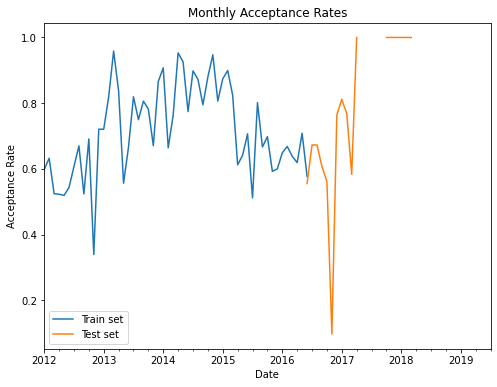

In [44]:
# create a single plot
ax = monthly_data["Acceptance_Rate"].plot(x='Date', y='Value', figsize=(8,6),)

# plot data from the second dataframe onto the same plot
monthly_data_train["Acceptance_Rate"].plot(x='Date', y='Value', ax=ax)

# set title and labels
ax.set_title('Monthly Acceptance Rates')
ax.set_xlabel('Date')
ax.set_ylabel('Acceptance Rate')
ax.legend(['Train set', 'Test set'])

# display the plot
plt.show()

##  text variables

In [45]:
data=alertP1.copy()
data=data[data['text_length']>0]
# compute the number of rows to select
n = int(len(data) * 0.8)

# select the first 80% of rows using slicing
first_80_percent_df = data.iloc[:n]
#select the last 20%
last_20_percent_df=data.iloc[n:]
last_20_percent_df['DATA_RETORNO']


1559   2016-05-16
196    2016-05-17
1381   2016-05-18
360    2016-05-19
323    2016-05-19
          ...    
1385   2017-03-12
1227   2017-03-20
575    2018-01-17
154    2018-03-08
142    2019-07-10
Name: DATA_RETORNO, Length: 322, dtype: datetime64[ns]

In [46]:
df = first_80_percent_df.copy()
df['Total'] = 1
df=df[["DATA_RETORNO","result","Total"]]
df["result"]=df["result"].astype(int)
df.set_index("DATA_RETORNO", inplace=True)
df

,result,Total
DATA_RETORNO,,
2012-01-10,1,1
2012-01-11,0,1
2012-01-12,1,1
2012-01-13,0,1
2012-01-17,1,1
...,...,...
2016-05-16,1,1
2016-05-16,1,1
2016-05-16,1,1


In [48]:
#WEEKLY referral distribution for all sample
WEEKLY_data = df.resample('W').agg({'result': 'sum', 'Total': 'sum'})
WEEKLY_data["Acceptance_Rate"]=WEEKLY_data["result"]/WEEKLY_data["Total"]
#Monthly distribution
monthly_data = df.resample('M').agg({'result': 'sum', 'Total': 'sum'})
monthly_data["Acceptance_Rate"]=monthly_data["result"]/monthly_data["Total"]
WEEKLY_data

,result,Total,Acceptance_Rate
DATA_RETORNO,,,
2012-01-15,2,4,0.500000
2012-01-22,1,3,0.333333
2012-01-29,10,11,0.909091
2012-02-05,2,5,0.400000
2012-02-12,5,6,0.833333
...,...,...,...
2016-04-24,1,1,1.000000
2016-05-01,0,0,NaN
2016-05-08,1,1,1.000000


In [51]:
df = last_20_percent_df.copy()
df['Total'] = 1
df=df[["DATA_RETORNO","result","Total"]]
df["result"]=df["result"].astype(int)
df.set_index("DATA_RETORNO", inplace=True)
df

,result,Total
DATA_RETORNO,,
2016-05-16,1,1
2016-05-17,0,1
2016-05-18,0,1
2016-05-19,0,1
2016-05-19,1,1
...,...,...
2017-03-12,1,1
2017-03-20,1,1
2018-01-17,1,1


In [53]:
#WEEKLY referral distribution for all sample
WEEKLY_data_train = df.resample('W').agg({'result': 'sum', 'Total': 'sum'})
WEEKLY_data_train["Acceptance_Rate"]=WEEKLY_data_train["result"]/WEEKLY_data_train["Total"]
#Monthly distribution
monthly_data_train = df.resample('M').agg({'result': 'sum', 'Total': 'sum'})
monthly_data_train["Acceptance_Rate"]=monthly_data_train["result"]/monthly_data_train["Total"]
WEEKLY_data_train

,result,Total,Acceptance_Rate
DATA_RETORNO,,,
2016-05-22,16,24,0.666667
2016-05-29,1,1,1.000000
2016-06-05,1,2,0.500000
2016-06-12,5,6,0.833333
2016-06-19,2,5,0.400000
...,...,...,...
2019-06-16,0,0,NaN
2019-06-23,0,0,NaN
2019-06-30,0,0,NaN


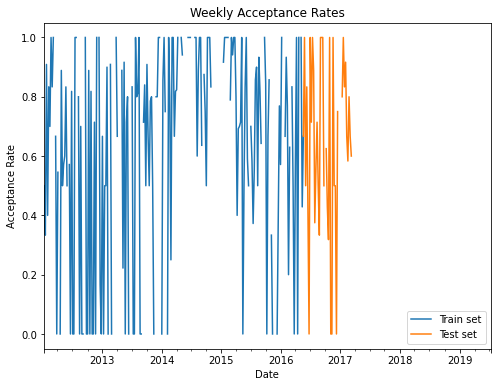

In [54]:
# create a single plot
ax = WEEKLY_data["Acceptance_Rate"].plot(x='Date', y='Value', figsize=(8,6))

# plot data from the second dataframe onto the same plot
WEEKLY_data_train["Acceptance_Rate"].plot(x='Date', y='Value', ax=ax)

# set title and labels
ax.set_title('Weekly Acceptance Rates')
ax.set_xlabel('Date')
ax.set_ylabel('Acceptance Rate')
ax.legend(['Train set', 'Test set'])

# display the plot
plt.show()

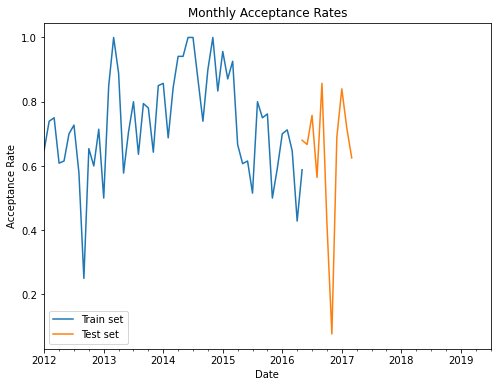

In [18]:
# create a single plot
ax = monthly_data["Acceptance_Rate"].plot(x='Date', y='Value', figsize=(8,6))

# plot data from the second dataframe onto the same plot
monthly_data_train["Acceptance_Rate"].plot(x='Date', y='Value', ax=ax)

# set title and labels
ax.set_title('Monthly Acceptance Rates')
ax.set_xlabel('Date')
ax.set_ylabel('Acceptance Rate')
ax.legend(['Train set', 'Test set'])

# display the plot
plt.show()